<a href="https://colab.research.google.com/github/Zanele-Mkh/Sales_data_analysis_dashboard/blob/main/ML_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Project Overview
Title: Predicting Used Car Prices
Objective: Build a regression model to predict used car prices based on features like make, model, mileage, and more.



2. Data Exploration & Preprocessing

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Zanel\Downloads\car_data_v2.csv")

In [ ]:
# Initial info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB
None


In [ ]:
print(df.describe())

       vehicle_age      km_driven      mileage    max_power        seats  \
count  2119.000000    2119.000000  2119.000000  2119.000000  2119.000000   
mean      6.153374   42207.621992    22.574856    61.802931     5.002832   
std       3.524845   27950.561196     3.008683    13.112960     0.176503   
min       0.000000     581.000000    14.400000    38.400000     4.000000   
25%       4.000000   21000.000000    20.510000    53.260000     5.000000   
50%       5.000000   38000.000000    22.740000    67.000000     5.000000   
75%       8.000000   58494.000000    23.950000    67.050000     5.000000   
max      29.000000  425785.000000    33.540000   123.370000     7.000000   

       selling_price  
count   2.119000e+03  
mean    3.287744e+05  
std     1.496699e+05  
min     4.000000e+04  
25%     2.490000e+05  
50%     3.150000e+05  
75%     3.900000e+05  
max     1.240000e+06  


In [ ]:
print(df.isnull().sum())

car_name         0
brand            0
model            0
vehicle_age      0
km_driven        0
mileage          0
max_power        0
seats            0
selling_price    0
dtype: int64


In [ ]:
# Drop 'car_name' (redundant with brand and model)
df.drop('car_name', axis=1, inplace=True)

In [ ]:
# Handle missing values
df.dropna(inplace=True)


In [ ]:
# Encode categorical features
df = pd.get_dummies(df, columns=['brand', 'model'], drop_first=True)

In [ ]:
# Define features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

3. Model Selection & Evaluation

In [ ]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [ ]:
# Evaluate Linear Regression
print("Linear Regression R2 Score:", r2_score(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))

Linear Regression R2 Score: -4.3637336837274056e+25
MAE: 4.325978335192265e+16
MSE: 7.934773547965023e+35
RMSE: 8.907734587404938e+17


In [ ]:
# Try Decision Tree and Random Forest
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

In [ ]:

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [ ]:
print("Decision Tree R2:", r2_score(y_test, dt_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))

Decision Tree R2: 0.802583619399651
Random Forest R2: 0.8858018044925462


4. Hyperparameter Tuning (Random Forest)

In [ ]:
# GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'n_estimators': [50, 100]},
             scoring='r2')

In [ ]:
# Best model
best_rf = grid.best_estimator_
best_pred = best_rf.predict(X_test)

print("Tuned Random Forest R2:", r2_score(y_test, best_pred))

Tuned Random Forest R2: 0.8952192318123489


5. Results & Conclusion

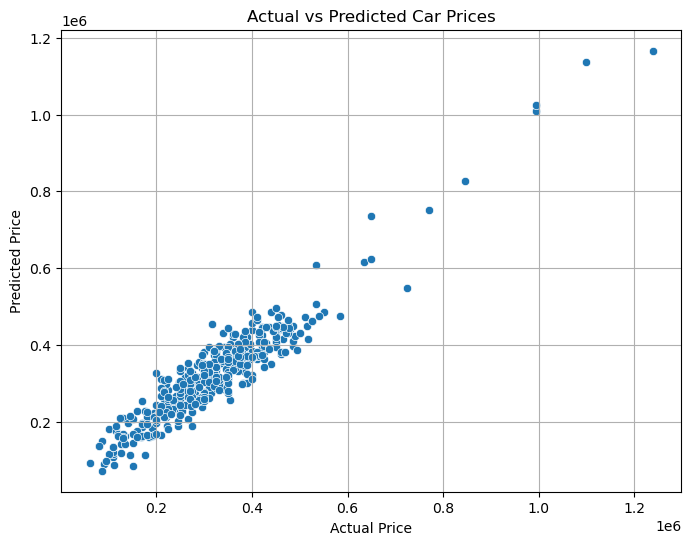

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=best_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

Summary:

Random Forest performed the best with the highest R² score.

Most important features: vehicle_age, km_driven, brand, model, mileage, max_power.

Future Improvements:

Add more features like location or fuel type.

Try feature selection and outlier treatment for better performance.

